In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [4]:
df.value_counts()

Cabin            Ticket    number  Survived
B35              PC 17477  2       1           2
B57 B59 B63 B66  PC 17608  1       1           2
A10              13049     3       0           1
D36              35273     1       1           1
D21              17464     1       1           1
                                              ..
C125             PC 17582  2       1           1
                           3       1           1
C126             19996     4       1           1
                           A       1           1
T                113784    4       0           1
Name: count, Length: 202, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Cabin     204 non-null    object
 1   Ticket    891 non-null    object
 2   number    891 non-null    object
 3   Survived  891 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 28.0+ KB


In [6]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passenger travelling with')

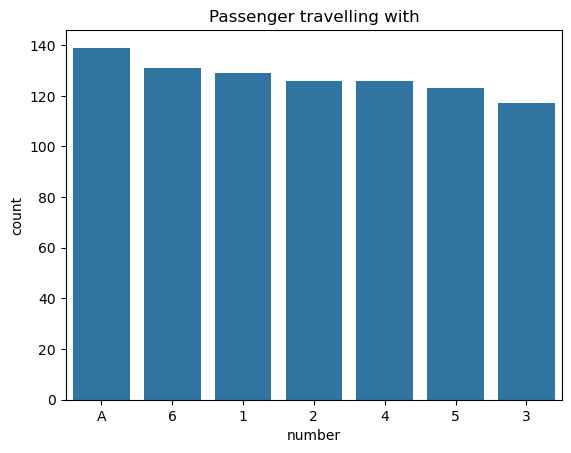

In [13]:
sns.barplot(df['number'].value_counts())
plt.title('Passenger travelling with')

In [14]:
# extract numerical part
df['number_numerical'] = pd.to_numeric(df['number'], errors = 'coerce', downcast= 'integer')

In [15]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical
0,NaN,A/5 21171,5,0,5.0
1,C85,PC 17599,3,1,3.0
2,NaN,STON/O2. 3101282,6,1,6.0
3,C123,113803,3,1,3.0
4,NaN,373450,A,0,NaN


In [16]:
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)

In [17]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [22]:
df['Cabin'].nunique()

147

In [23]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [25]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)')
df['cabin_cat'] = df['Cabin'].str[0]

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ACER\AppData\Local\Temp\ipykernel_17900\1514254807.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['cabin_num'] = df['Cabin'].str.extract('(\d+)')


In [26]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<Axes: xlabel='cabin_cat'>

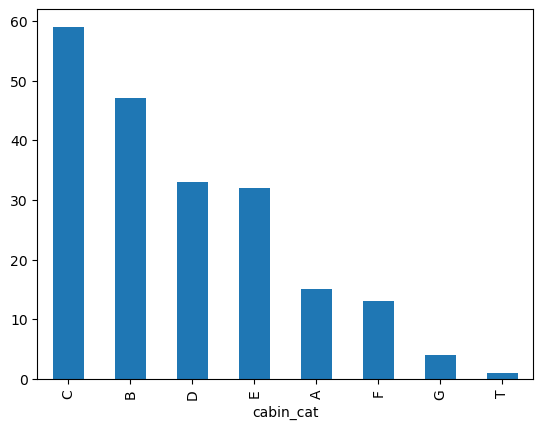

In [27]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [28]:
#extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s:s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'], errors ='coerce', downcast='integer')

#extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s:s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan, df['ticket_cat'])

In [29]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
